In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize


In [2]:
EPOCHS = 10

loss_df = pd.read_csv('loss.txt')
loss_df = loss_df[1:]
loss_df.head()

,Generator_loss,Discriminator_loss
1,95.149147,4.202059
2,90.618530,1.544708
3,89.064354,2.120419
4,84.627319,1.273214
5,82.913422,1.205507


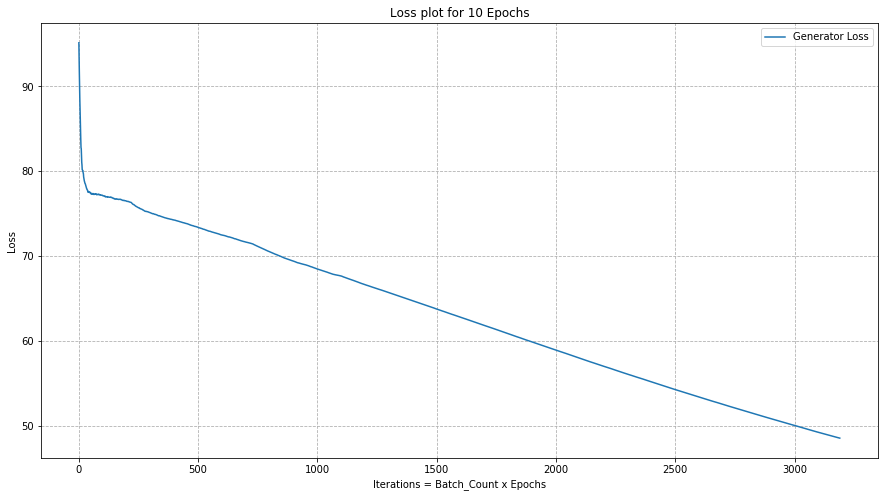

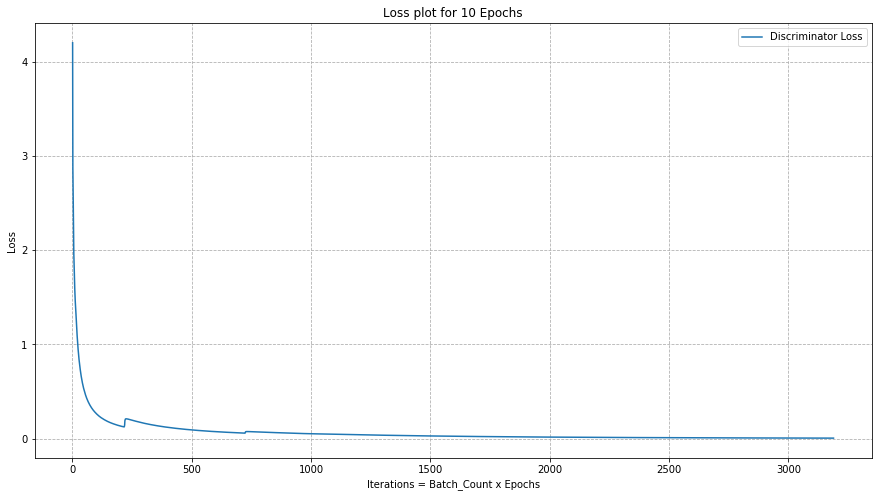

In [3]:
gl,dl=pd.DataFrame(loss_df.Generator_loss,dtype=float),pd.DataFrame(loss_df.Discriminator_loss,dtype=float)
gl = gl.ewm(alpha = 0.001).mean()
dl = dl.ewm(alpha = 0.001).mean()

plt.figure(figsize=(15,8))
plt.plot(gl,label='Generator Loss')
plt.xlabel('Iterations = Batch_Count x Epochs')
plt.ylabel('Loss')
plt.title('Loss plot for %d Epochs'%EPOCHS)
plt.grid(linestyle='--')
plt.legend()
plt.savefig('gloss.png')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(dl,label='Discriminator Loss')
plt.xlabel('Iterations = Batch_Count x Epochs')
plt.ylabel('Loss')
plt.title('Loss plot for %d Epochs'%EPOCHS)
plt.grid(linestyle='--')
plt.legend()
plt.savefig('dloss.png')
plt.show()


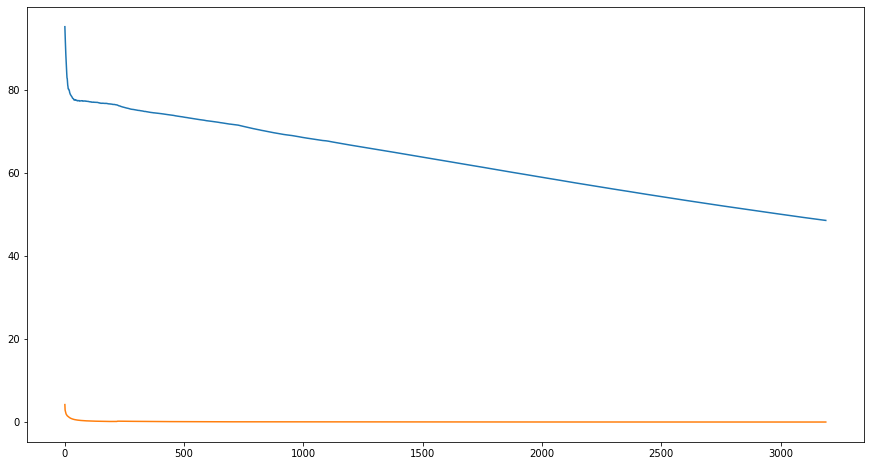

In [4]:
from matplotlib import animation

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)

def animate(i):
    loss_df = pd.read_csv('loss.txt')
    loss_df = loss_df[1:]
    gl,dl=pd.DataFrame(loss_df.Generator_loss,dtype=float),pd.DataFrame(loss_df.Discriminator_loss,dtype=float)
    gl = gl.ewm(alpha = 0.001).mean()
    dl = dl.ewm(alpha = 0.001).mean()
    ax.clear()
    ax.plot(gl)
    ax.plot(dl)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [5]:
d={1:186.1532,2:99.0406,4:74.1320,8:62.4991,16:55.1611,32:53.7876,64:55.0959,6:63.0249,10:59.7434,12:57.6161,14:58.8391,20:56.5403,24:53.235,28:55.6541,36:54.1396,40:52.5294,48:54.1265,56:52.918,72:54.414,84:53.6951,88:57.4093}
df2=pd.DataFrame({'batch_size':list(d.keys()),'time':list(d.values())})
df2=df2.sort_values('batch_size').reset_index().drop('index',axis=1)

idx=0
for i in d:
    if d[i]==min(df2.time):
        idx=i
        
mt=min(df2.time)
s='batch_size: %d\ntime: %d'%(idx,mt)
df2.head()

,batch_size,time
0,1,186.1532
1,2,99.0406
2,4,74.1320
3,6,63.0249
4,8,62.4991


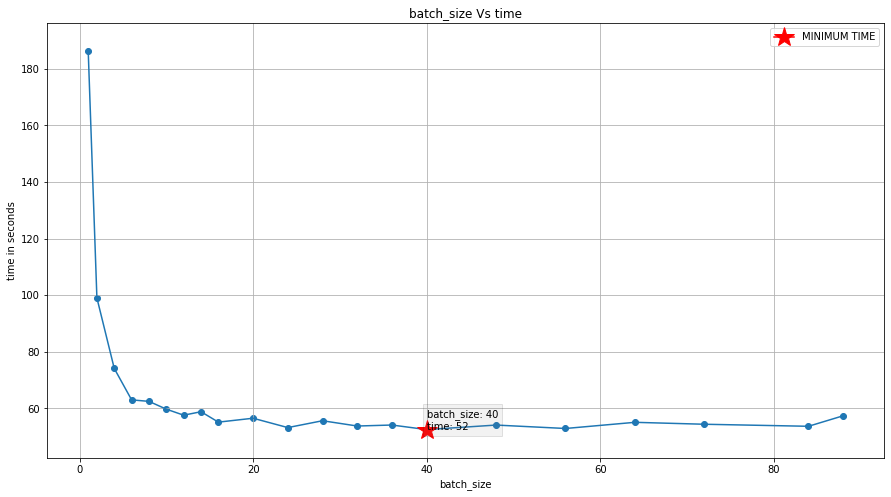

In [6]:
plt.figure(figsize=(15,8))
plt.plot(df2.batch_size,df2.time)
plt.scatter(df2.batch_size,df2.time)
plt.plot(idx,mt,color='red',marker='*',markersize=20,label='MINIMUM TIME')
plt.ylim([mt-10,max(df2.time)+10])
plt.xlabel('batch_size')
plt.ylabel('time in seconds')
plt.title('batch_size Vs time')
plt.text(idx, mt, s, bbox=dict(facecolor='grey', alpha=0.1))
plt.grid()
plt.legend()
#plt.savefig('batchvstime.png')
plt.show()